## Setting up data

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Reading Kings County House data & exploring data

In [2]:
housing = pd.read_csv('./kc_house_data.csv')
pd.set_option('precision', 2) #Setting dataframe precision
pd.set_option('display.max_rows', 50) #Setting max rows to display

housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Dropping columns that are not relevant to analysis

In [3]:
housing.drop(['id', 'date', 'waterfront', 'view', 'condition', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis =1, inplace = True) # These columns have extreme values or incorrect data
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,98178,47.51,-122.26
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,98125,47.72,-122.32
2,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,98028,47.74,-122.23
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,98136,47.52,-122.39
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,98074,47.62,-122.05


In [4]:
housing.price.describe()

count    2.16e+04
mean     5.40e+05
std      3.67e+05
min      7.80e+04
25%      3.22e+05
50%      4.50e+05
75%      6.45e+05
max      7.70e+06
Name: price, dtype: float64

### Checking shape after data clean up

In [5]:
housing.zipcode.describe()
column_heads = list(housing.columns.values)
column_heads.remove('price')
housing.shape

(21597, 13)

### Sampling 30% of the population

In [6]:
sample_df = housing.sample(frac=0.3, random_state=15)
sample_df.shape

(6479, 13)

### Separating xs & ys for train test split in later steps

In [7]:
xs_df = sample_df[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
ys_df = sample_df[['price']]
xs = np.array(xs_df)
ys = np.array(ys_df)

### Data visualizations

In [8]:
sns.set(font_scale=2)
sns.set_context('talk')
sns.set_style('darkgrid')

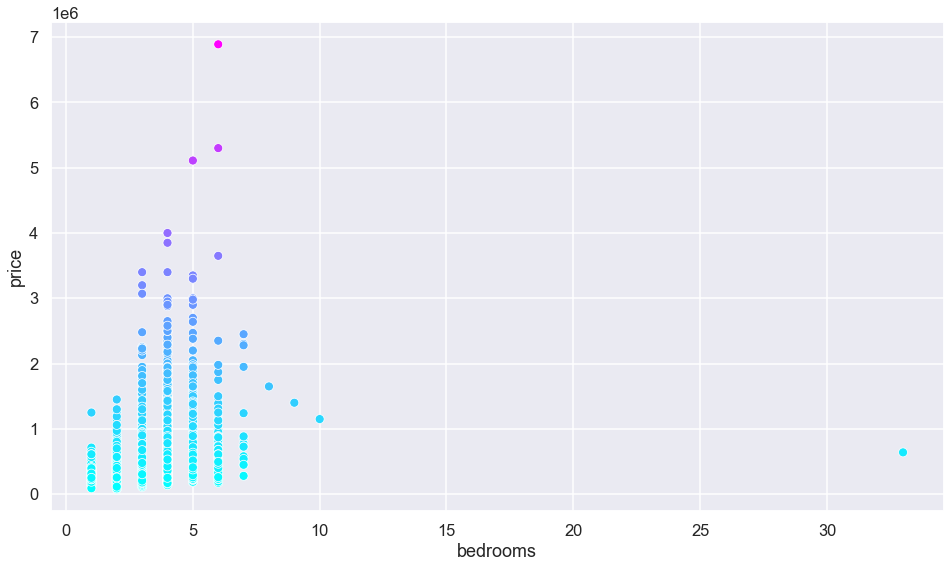

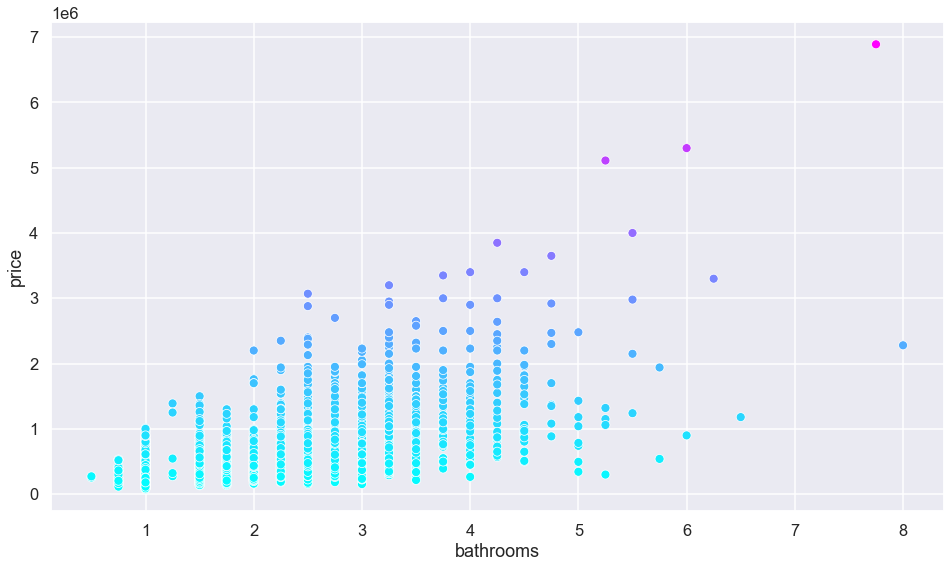

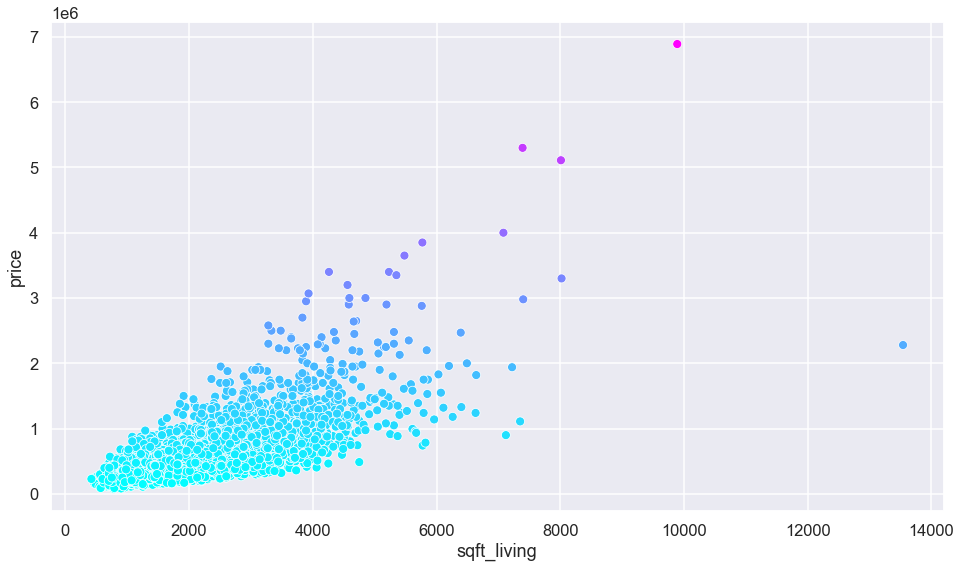

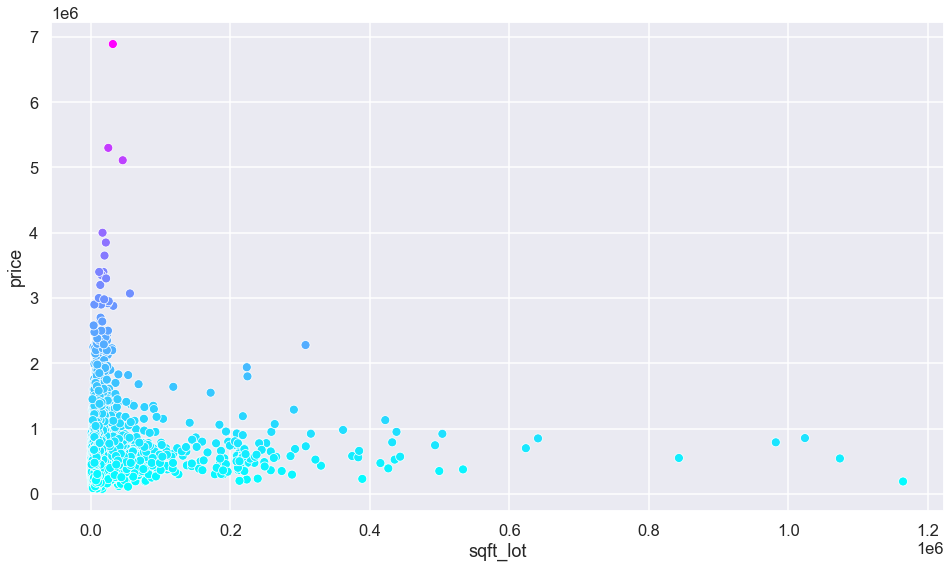

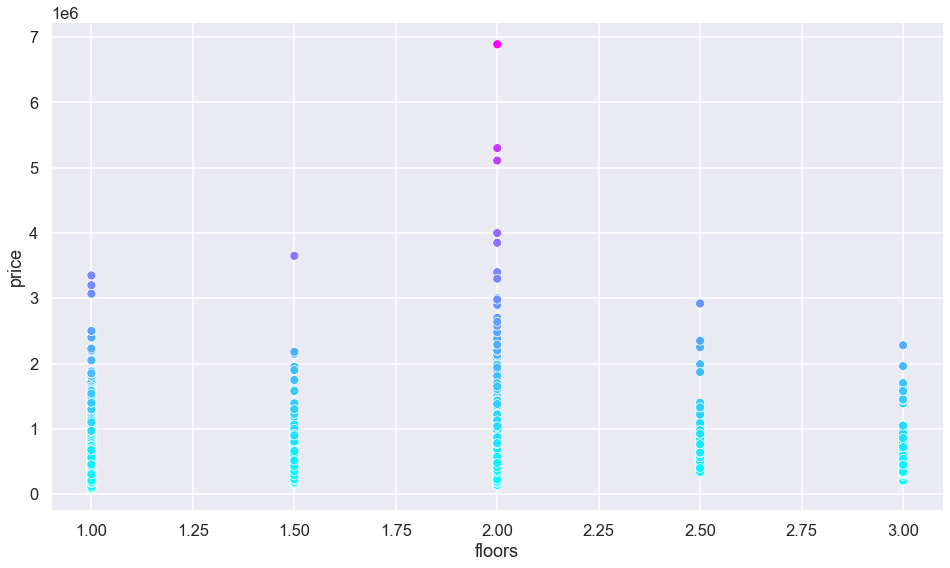

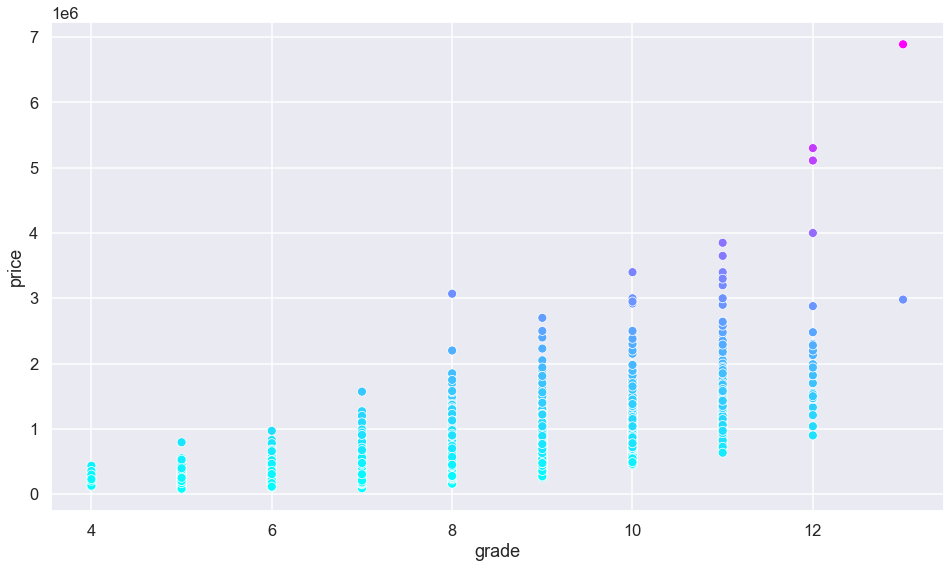

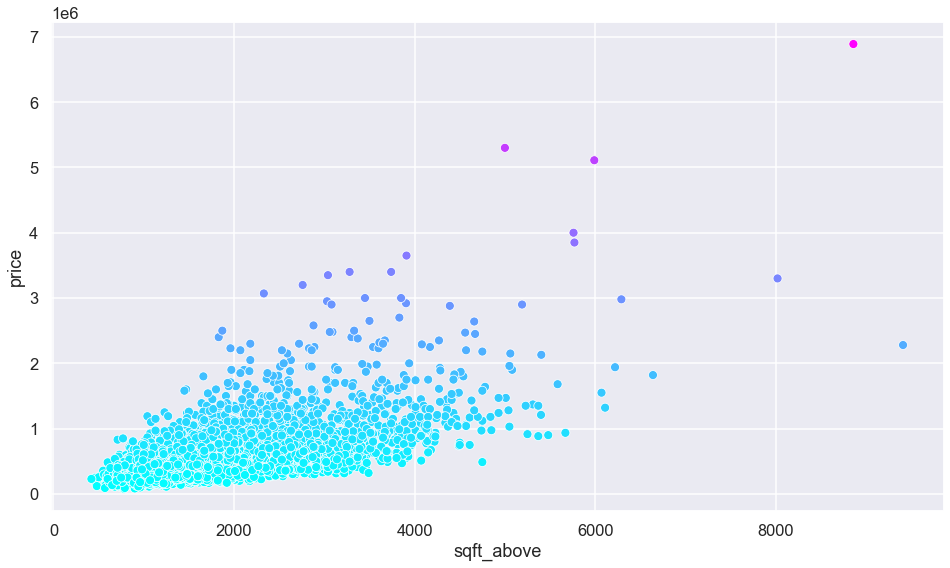

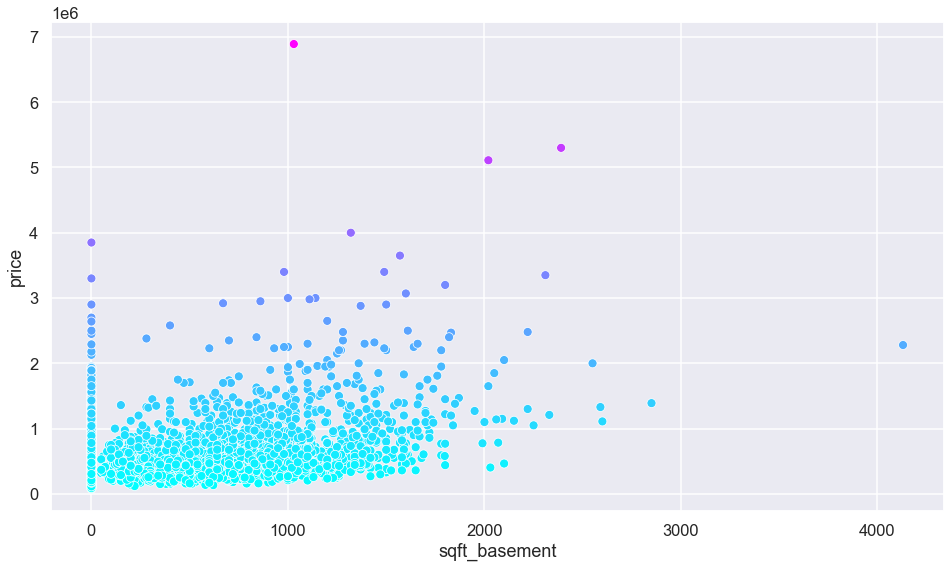

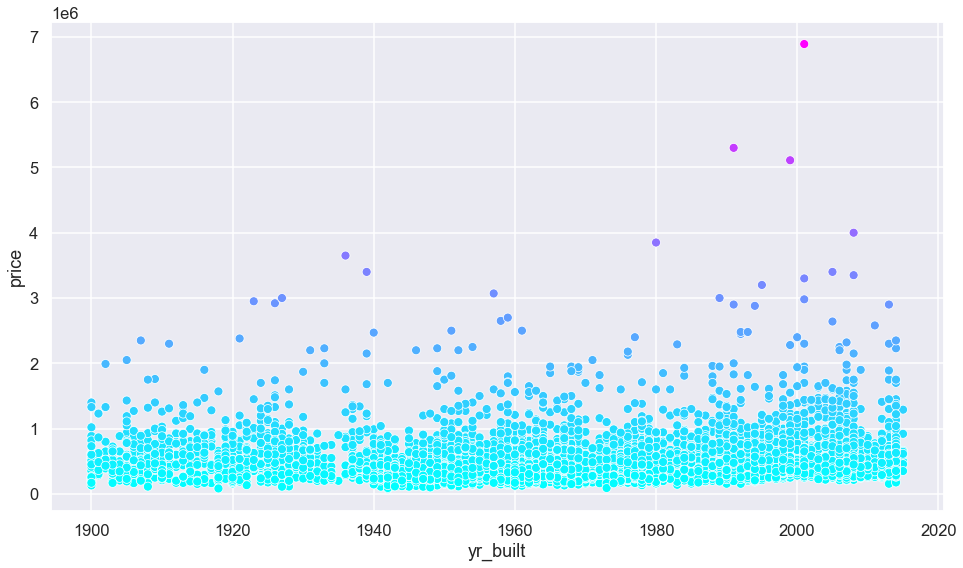

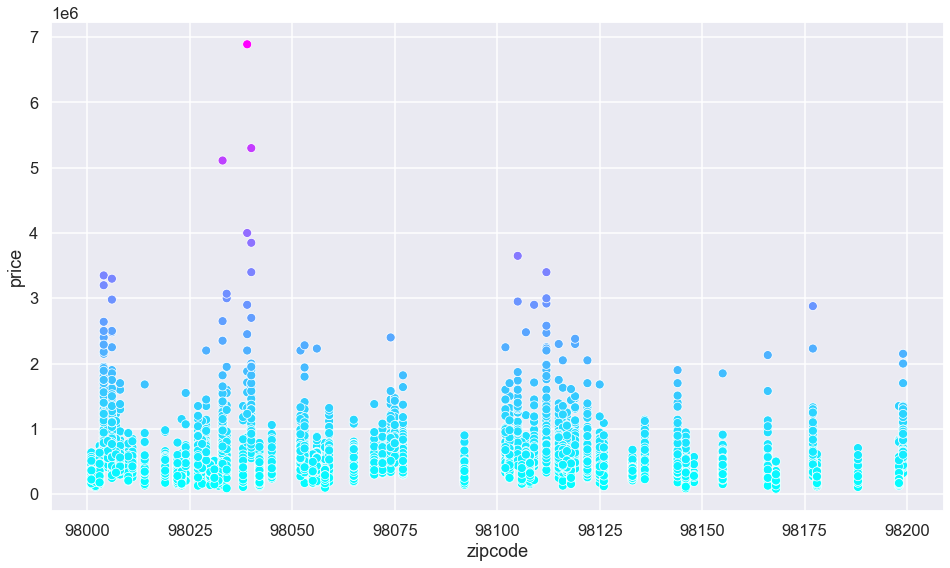

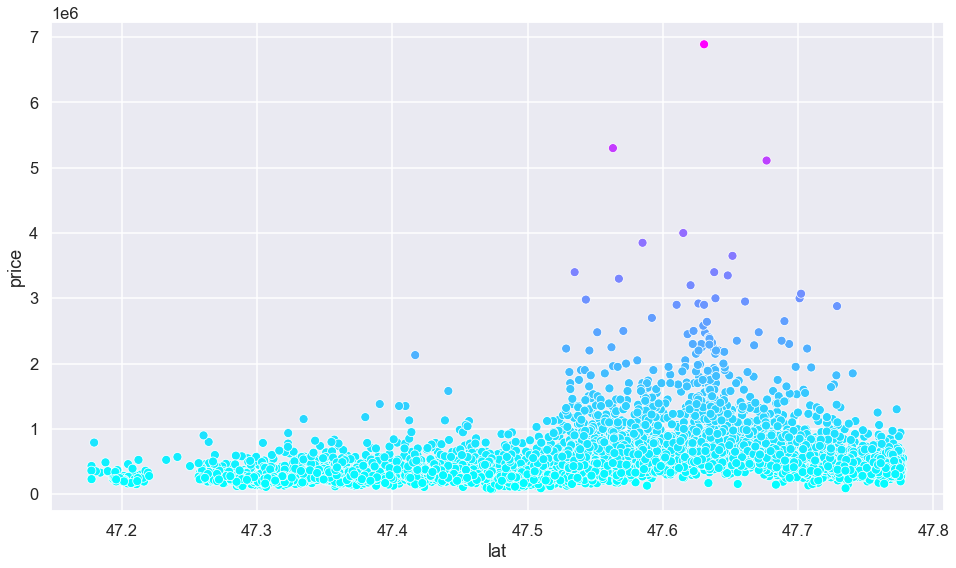

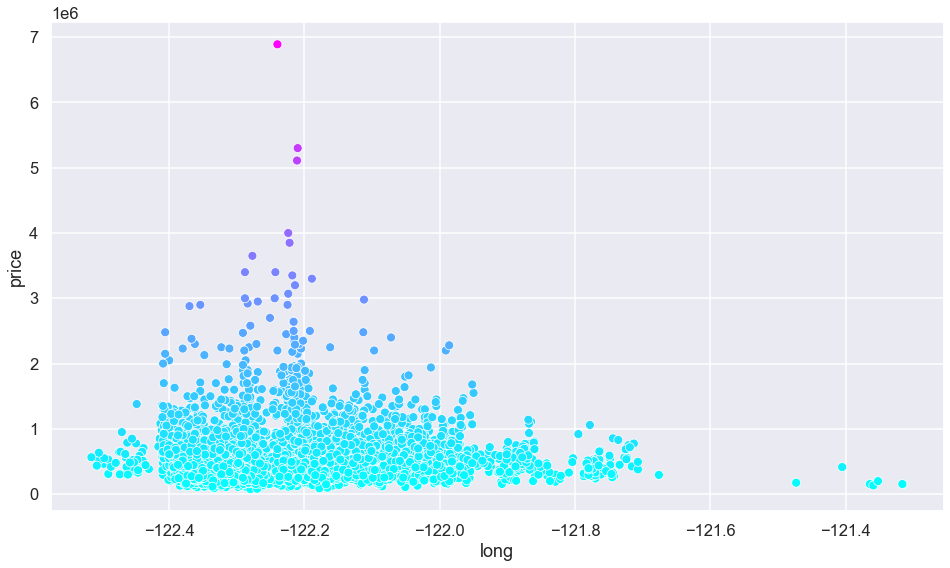

In [9]:
for feature in column_heads:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, y='price', 
                     hue='price', 
                     palette='cool', legend=False)

#### There are a few independant variables like sqft_basement, sqft_lot where values do bulk up but they have not been removed since those are big contributing factors to the value of a home

### Setting up test data & training data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2,random_state=11) 


print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (5183, 12)
Shape of testing  set = (1296, 12)


In [16]:
column_heads
print(type(X_train))

<class 'numpy.ndarray'>


### Train the model 

#### Printing regression coeffs

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(column_heads):
    print(f'{name:>11}: {linear_regression.coef_[0][i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_[0]:23.20f}')

   bedrooms: -49801.23932059736398514360
  bathrooms: 55452.25555230917234439403
sqft_living: 130.31618296796017375527
   sqft_lot:  -0.01550704252331508784
     floors: -3959.29305889017177833011
      grade: 112957.48848289561283309013
 sqft_above:  64.14725453253005582610
sqft_basement:  66.16892854767147014172
   yr_built: -3309.46278907799023727421
    zipcode: -570.71981230554115427367
        lat: 548028.64618140400853008032
       long: -212198.46330837204004637897

y-intercept: 9831097.17190424725413322449


### Test the model

In [18]:
predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.6
     correlation coefficient = 0.8


### Visualize the expected vs. predicted prices 

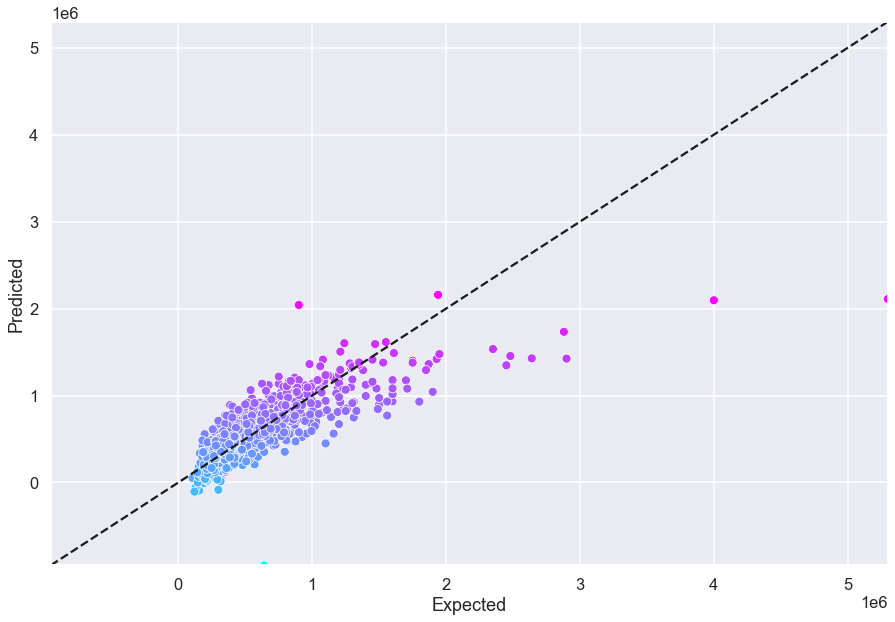

In [19]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected.flatten())
df['Predicted'] = pd.Series(predicted.flatten())

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

# Analysis